## 이론 정리
---
> * "선형 회귀"에대한 이론 확립  
> *  데이터의 분포를 확인하여 인자간 상관관계를 파악하고 상관계수를 구함   
> *  1차 함수 모델을 만들며 __가중치__를 배움   
     - y = wx + b  
> *  현재 모델의 출력값과 실제 값의 차이를 나타내는 __손실함수__를 학습함  
     - 평가 지표 4가지 : MAE, MSE, RMSE, R-squared -> RMSE, MSE 사용  
> * 기울기를 사용하여 손실함수 값을 점차 줄이는 __경사하강법__을 통하여 모델을 학습시킴  
     - w' = w - ng  
     -  미분식 이해, 하이퍼 파라미터(컵퓨터 계산입력X, 사용자 직접 입력)  
> * 다양한 형태의 그래프를 그릴 수 있는 __seaborn__패키지를 이용하여 다변수 선형회귀를 그림  
     - One Hot Encodding : 카테고리 데이터 -> 실수형 데이터 변환 => get_dummies() 함수 (in pandas)    
     - 회귀/분류 이해 : 맞추고자하는 값이 카테고리(분류)이냐, 연속된 실수값(회귀)에 따라 다름
> * 직접 gradient 값을 계산 및 학습시키기
> * __sklearn__라이브러리를 통하여 간단하게 해결  
---

## 프로젝트 1 : 당뇨병 수치 계산
---

### 1) 데이터 가져오기
---

In [1]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

df_X = diabetes.data
df_y = diabetes.target

#print(diabetes.DESCR)를 통해 자료 정보학인 
#pritn(df.X)를 통해 잘 입력됐는지 확인

- 본 자료는 당뇨병 환자의 데이터로 (442, 10) 크기를 갖고 있음
- 총 데이터 갯수는 442개, 특성은 10가지(age, sex, bmi등)가 있음

### 2) 모델에 입력할 데이터 X 준비하기
---

In [2]:
import numpy as np

X = np.array(df_X)
X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

Age값이 0.038, 0.041, Sex 값이 0.0506, -0.0446~ 등으로 이상한 것을 확인할 수 있는데, 이건 sklearn에서 모든 특성이 -0.2 ~ 0.2 사이에 분포하도록 조정해서 그런 것이라고 함. 

### 3) 모델에 예측할 데이터 y 준비하기
---

In [3]:
y = np.array(df_y)
y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

### 4) train 데이터와 test 데이터로 분리하기
---

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

#잘 나눠졌는지 확인
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


### 5) 모델 준비하기
---  

In [5]:
# 입력 데이터 갯수에 맞는 가중치 w, b 준비하기
w = np.random.rand(10)
b = np.random.rand()

#모델 함수 구현하기
#for문을 활용하여 y = w1x1 + w2x2 + ~ + w10x10 + b 식 만들기
def model(X, w, b):
    predictions = 0
    for i in range(10):
        predictions += X[:, i] * w[i]
    predictions += b
    return predictions

### 6) 손실함수 loss 정의하기 
---

In [6]:
#손실함수를 MSE 함수로 정의하기 
def MSE(a, b):
    mse = ((a - b) ** 2).mean()
    return mse

def loss(X, w, b, y):
    predictions = model(X, w, b)
    L = MSE(predictions, y)
    return L

### 7) 기울기를 구하는 gradient 함수 구현하기
---

In [7]:
def gradient(X, w, b, y):
    N = len(w)
    
    #y_pred 준비
    y_pred = model(X, w, b)
    
    #w의 gradient 식-> **X.dot(y)는 X와 y의 행렬곱. T는 형태 바꿔줌 
    dw = 1/N * 2 * X.T.dot(y_pred - y)
    
    #b의 gradient 식 
    db = 2 * (y_pred - y).mean()
    
    return dw, db

#시험삼아 계산
dw, db = gradient(X, w, b, y)
print(dw)
print(db)

[ -60.58209066  -13.81740356 -189.56857344 -142.63933829  -68.13289481
  -55.86676576  127.6726799  -138.93612305 -182.82917881 -123.48568001]
-303.55936760303314


### 8) 하이퍼 파라미터인 학습률 설정하기
---

In [8]:
#learning rate 설정하기!
learning_rate = 0.1

#1: 5 넘 높음.  2: 100 Loss nan

### 9) 모델 학습하기
---

iteration 100 : Loss 3015.5004
iteration 200 : Loss 2966.6164
iteration 300 : Loss 2962.0544
iteration 400 : Loss 2960.5535
iteration 500 : Loss 2959.4301
iteration 600 : Loss 2958.4026
iteration 700 : Loss 2957.4271
iteration 800 : Loss 2956.4926
iteration 900 : Loss 2955.5943
iteration 1000 : Loss 2954.7288
iteration 1100 : Loss 2953.8933
iteration 1200 : Loss 2953.0858
iteration 1300 : Loss 2952.3046
iteration 1400 : Loss 2951.5479
iteration 1500 : Loss 2950.8147
iteration 1600 : Loss 2950.1038
iteration 1700 : Loss 2949.4141
iteration 1800 : Loss 2948.7449
iteration 1900 : Loss 2948.0953
iteration 2000 : Loss 2947.4646
iteration 2100 : Loss 2946.8522
iteration 2200 : Loss 2946.2575
iteration 2300 : Loss 2945.6798
iteration 2400 : Loss 2945.1187
iteration 2500 : Loss 2944.5736
iteration 2600 : Loss 2944.0440
iteration 2700 : Loss 2943.5295
iteration 2800 : Loss 2943.0296
iteration 2900 : Loss 2942.5439


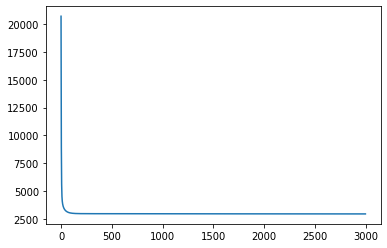

In [9]:
#정해진 손실함수와 기울기 함수로 모델 학습시키기
losses = []

for i in range(1,3000):
    dw, db = gradient(X_train, w, b, y_train)
    w -= learning_rate * dw
    b -= learning_rate * db
    L = loss(X_train, w, b, y_train)
    losses.append(L)
    
    if i % 100 == 0:
            print('iteration %d : Loss %0.4f' % (i, L) )

#데이터 시각화
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

#자꾸 loss nan 뜸...나니....?
#L, dw, db 값이 nan으로 나옴. -> test의 수 바꿔줌. -> lss값 20000~15000 
#-> lr 0.001 -> 0.01 => 6000~3000 -> 1로하니까 2000대

### 9-1) 추가. 성별 데이터 제외하고 모델 학습시켜보기
---

iteration 100 : Loss 3067.1552
iteration 200 : Loss 3061.3194
iteration 300 : Loss 3056.8976
iteration 400 : Loss 3053.4835
iteration 500 : Loss 3050.8410
iteration 600 : Loss 3048.7951
iteration 700 : Loss 3047.2110
iteration 800 : Loss 3045.9846
iteration 900 : Loss 3045.0350
iteration 1000 : Loss 3044.2998
iteration 1100 : Loss 3043.7305
iteration 1200 : Loss 3043.2898
iteration 1300 : Loss 3042.9485
iteration 1400 : Loss 3042.6843
iteration 1500 : Loss 3042.4797
iteration 1600 : Loss 3042.3213
iteration 1700 : Loss 3042.1987
iteration 1800 : Loss 3042.1038
iteration 1900 : Loss 3042.0302
iteration 2000 : Loss 3041.9733
iteration 2100 : Loss 3041.9292
iteration 2200 : Loss 3041.8951
iteration 2300 : Loss 3041.8687
iteration 2400 : Loss 3041.8482
iteration 2500 : Loss 3041.8324
iteration 2600 : Loss 3041.8201
iteration 2700 : Loss 3041.8107
iteration 2800 : Loss 3041.8033
iteration 2900 : Loss 3041.7976


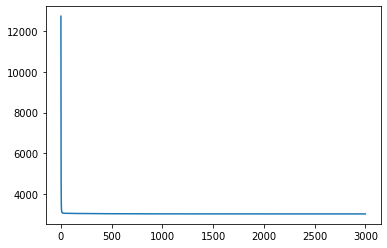

In [10]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

df_X = diabetes.data
df_y = diabetes.target

import numpy as np

x = np.array(df_X)
X = np.delete(x,1,axis=1) #성별 데이터 제외시킴
y = np.array(df_y)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

w = np.random.rand(9)
b = np.random.rand()

#모델 함수 구현하기
def model(X, w, b):
    predictions = 0
    for i in range(9):
        if i == 1:
            pass
        predictions += X[:, i] * w[i]
    predictions += b
    return predictions

def MSE(a, b):
    mse = ((a - b) ** 2).mean()
    return mse

def loss(X, w, b, y):
    predictions = model(X, w, b)
    L = MSE(predictions, y)
    return L

def gradient(X, w, b, y):
    N = len(w)
    y_pred = model(X, w, b)
    dw = 1/N * 2 * X.T.dot(y_pred - y)
    db = 2 * (y_pred - y).mean()
    return dw, db

learning_rate = 0.8

losses = []

for i in range(1,3000):
    dw, db = gradient(X_train, w, b, y_train)
    w -= learning_rate * dw
    b -= learning_rate * db
    L = loss(X_train, w, b, y_train)
    losses.append(L)
    
    if i % 100 == 0:
            print('iteration %d : Loss %0.4f' % (i, L) )

import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

1) 같은 l.r(0.01)를 사용해서 돌려봤을때, loss값 7,000 ~ 3,000대 나옴  
2) l.r 0.001 사용시 loss값 25,000 ~ 4,700  
3) l.r 0.5 사용시 loss 값 3,000대   
4) l.r 0.8 사용시 loss 값 3,070 ~ 3,044로 수렴  
**결론 : 나이 특성을 제외 시켰을때, loss 값이 더 크게 발생하는 것으로 보아 나이를 포함하여 학습시키는 것이 더 유의미함을 알 수 있음.**

### 10) test 데이터에 대한 성능 확인하기
---

In [11]:
prediction = model(X_test, w, b)
mse = loss(X_test, w, b, y_test)
mse

2690.2640730615694

### 11) 정답 데이터와 예측한 데이터 시각화하기
---
- X축에 첫번째 컬럼, Y축은 예측값대입

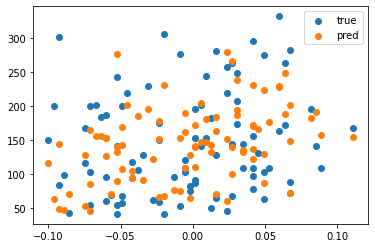

In [12]:
plt.scatter(X_test[:, 0], y_test, label="true")
plt.scatter(X_test[:, 0], prediction, label="pred")
plt.legend()
plt.show()

### 프로젝트 1 결론   

- loss 값이 3,000 이하로 수렴하여 최적의 함수를 찾았으며, test값에 대한 MSE 값도 3,000이하 값을 얻어 비교적 괜찮은 함수를 찾았음이 확인됨. 
---

---
## 프로젝트 2. 자전거 타는 사람 추론하기  

> 시간, 온도, 습도, 계절 등의 정보가 담긴 데이터를 통해 가전거 대여량 예측하기
> 직접 손실함수와 기울기를 계산하지 않고, 사이킷런의 LinearRegression 모델 활용

### 1) 데이터 가져오기
---

In [13]:
!ls '/aiffel/data/data/bike-sharing-demand/test.csv'

/aiffel/data/data/bike-sharing-demand/test.csv


In [14]:
import pandas as pd

csv_path = '/aiffel/data/data/bike-sharing-demand/train.csv' #이렇게 해야 눈에 깔끔하게 잘 들어옴
train = pd.read_csv(csv_path) #read_csv 함수다!!!
train.info()
train.head() #head도 함수로 보는게 더 깔끔함

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


상기 데이터를 보면,   
총 데이터의 갯수는 10886개이며 각 특성은 총 12개로  
- datetime(시간)  
- season(계절) 
- holiday(주말)
- workingday(평일)
- weather(1:맑음 ~ 4:천둥,심한비)
- temp(온도)
- atemp(체감온도_섭씨)
- humidity(습도)
- windspeed(풍속)
- casual(미등록 사용자가 대여한 횟수)
- registered(등록된 사용자가 대여한 횟수)
- count(렌탈 총합)  
인 것을 확인할 수 있다.  

여기서 __결정값은 대여 횟수인 count__ 값이고, 특성 대부분의 값이 결정값에 영향을 주지 않을까 싶다.  
그리고 casual, registered는 두 값을 더하여 count값이 되므로 casual, registered는 삭제해주는 것이 나을 것 같다. 

### 2) datetime 컬럼을  datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초 까지 6가지 컬럼 생성하기
---

In [15]:
train.dtypes
#object 이므로 타입을 datetime형식으로 변경해야함

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

대부분의 인자가 int 혹은 float 타입으로 처리하기 쉬우나, datetime은 object 값이므로 to_datetime을 이용하여 타입을 변경시켜준다.  

또한 이렇게 데이터를 사용할 때, 한번에 붙어있는 것 보단 년, 월, 일, 시 등으로 쪼개줘야 처리하기도 간편할 것 같음. 

In [16]:
train['datetime'] = pd.to_datetime(train['datetime'])

train.dtypes
#train의 타입이 datetime으로 변경된 것을 볼 수 있음

#칼럼 생성하기
train['year']=pd.DatetimeIndex(train['datetime']).year
train['month']=pd.DatetimeIndex(train['datetime']).month
train['day']=pd.DatetimeIndex(train['datetime']).day
train['hour']=pd.DatetimeIndex(train['datetime']).hour
train['minute']=pd.DatetimeIndex(train['datetime']).minute
train['second']=pd.DatetimeIndex(train['datetime']).second

train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


<AxesSubplot:xlabel='second', ylabel='count'>

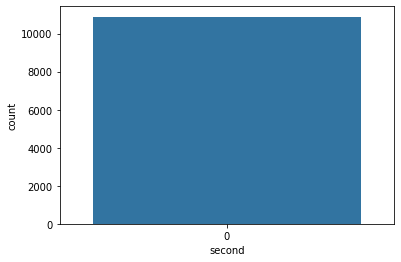

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="year", data=train)
sns.countplot(x="month", data=train)
sns.countplot(x="day", data=train)
sns.countplot(x="hour", data=train)
sns.countplot(x="minute", data=train)
sns.countplot(x="second", data=train)


<AxesSubplot:xlabel='second', ylabel='count'>

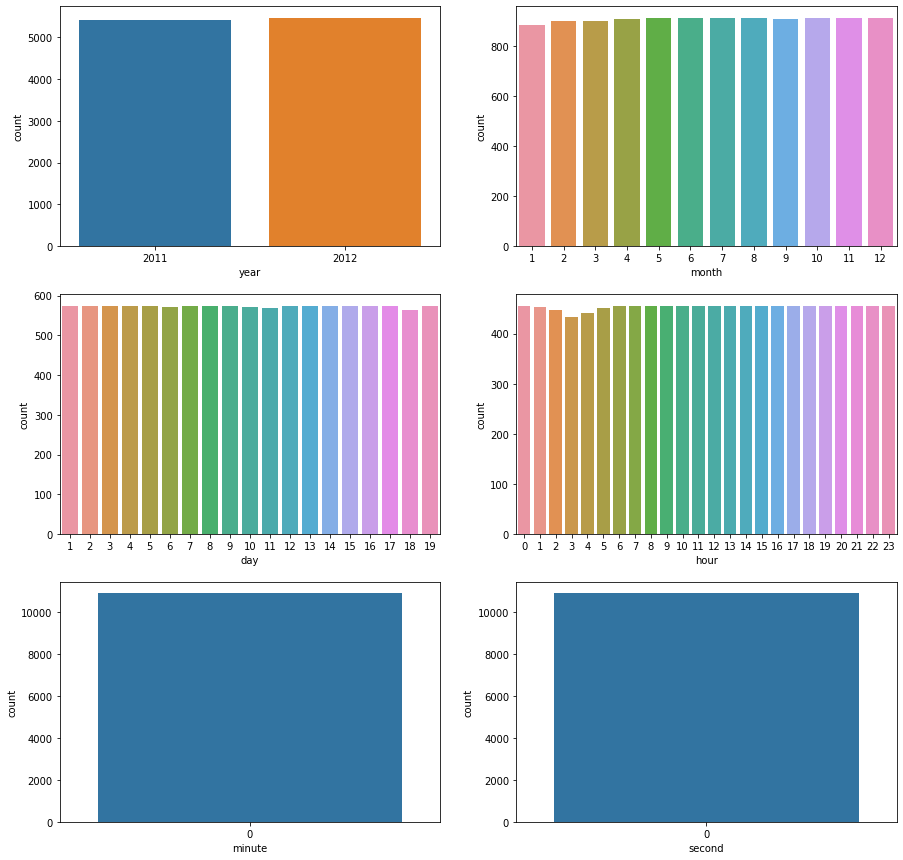

In [18]:
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(3, 2, 1)
sns.countplot(x="year", data=train, ax=ax1)
ax2 = fig.add_subplot(3, 2, 2)
sns.countplot(x="month", data=train, ax=ax2)
ax3 = fig.add_subplot(3, 2, 3)
sns.countplot(x="day", data=train, ax=ax3)
ax4 = fig.add_subplot(3, 2, 4)
sns.countplot(x="hour", data=train, ax=ax4)
ax5 = fig.add_subplot(3, 2, 5)
sns.countplot(x="minute", data=train, ax=ax5)
ax6 = fig.add_subplot(3, 2, 6)
sns.countplot(x="second", data=train,ax=ax6)


#plt.plot(train,y)
#plt.subplot(nrow,ncol,pos)

상기 그래프를 보았을 때, 단순 카운트긴 하지만   
year은 년도 별 사용자의 변화가 크게 없어 이후 x특성으로 넣지 않아도 될 것 같음

### 4) X, y 컬럼 선택 및 train/test 데이터 분리
---  

X에는 문자열 데이터, 쓸모없는 데이터를 제외한 칼럼의 데이터를 넣어야하는데  
우선,  
- datetime은 분리하여 칼럼에 추가하였으므로 제외
- year은 상기 그래프를 통해 넣지 않아도 됨을 판단하여 제외
- minute, second는 구하고자하는 자전거 타는 사람을 구할때 큰 영향을 끼치지 않을 것으로 생각됨
- casual, registered 값은 합쳐서 count 값이 되므로 제외

따라서  
datetime, year, minute, secound, casual, registered 값 제외하여 X 데이터 설정, y는 count 값을 설정하기로함.

In [19]:
y = train['count']
train = train.drop(columns = ['datetime', 'year', 'minute', 'second', 'casual', 'registered', 'count'])
X = train
print(X) #x 값 잘 입력됐는지 확인

print(y)#y 값 잘 입력됐는지 확인

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)


       season  holiday  workingday  weather   temp   atemp  humidity  \
0           1        0           0        1   9.84  14.395        81   
1           1        0           0        1   9.02  13.635        80   
2           1        0           0        1   9.02  13.635        80   
3           1        0           0        1   9.84  14.395        75   
4           1        0           0        1   9.84  14.395        75   
...       ...      ...         ...      ...    ...     ...       ...   
10881       4        0           1        1  15.58  19.695        50   
10882       4        0           1        1  14.76  17.425        57   
10883       4        0           1        1  13.94  15.910        61   
10884       4        0           1        1  13.94  17.425        61   
10885       4        0           1        1  13.12  16.665        66   

       windspeed  month  day  hour  
0         0.0000      1    1     0  
1         0.0000      1    1     1  
2         0.0000      1 

**X값 넣을 때 count 빼주는거 확인해야함...!!!!**

### 5) LinearRegression 모델 학습
---

In [20]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

### 6) 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산
---  
- 학습된 모델에 X_train 입력해서 예측값 출력하기
- 모델이 예측한 값과 정답 target 간의 손실함수 값 계산하기
- mse 값과 함께 rmse 값도 계산하기

In [21]:
model.fit(X_train, y_train)
predictions = model.predict(X_test)
predictions


from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
RMSE = mean_squared_error(y_test, predictions)**0.5

print('mse값: ', mse, 'RMSE값: ', RMSE)

mse값:  21608.18452969114 RMSE값:  146.99722626529774


MSE값이 3,000 밑으로 내려가고, RMSE값이 100대로 낮은 것으로 보아 현재 예측값을 잘 학습했다고 볼 수 있음

### 7) x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기
---

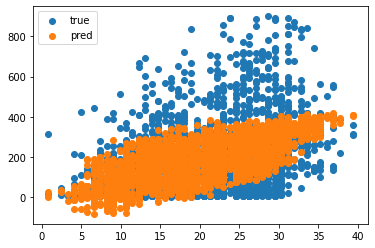

In [29]:
import matplotlib.pyplot as plt

#(1) x축은 temp, y축은 count 데이터 넣어 시각화 하기
plt.scatter(X_test['temp'], y_test, label="true")
plt.scatter(X_test['temp'], predictions, label="pred")
plt.legend()
plt.show()

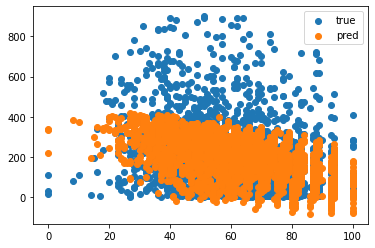

In [30]:
#(2) x축은 humidity, y축은 count 데이터 넣어 시각화 하기
plt.scatter(X_test['humidity'], y_test, label="true")
plt.scatter(X_test['humidity'], predictions, label="pred")
plt.legend()
plt.show()

- 마지막 시각화를 통하여 예측값과 실제 값이 어느정도 유사하게 됨을 확인. 하지만 실제값이 훨씬 넓게 분포되어 있는 것을 보아 튀는 값들을 어느정도까지 두어야하는지는 더 생각해봐야할 것 같음.
---

## 회고
---
1. 우선 이번 과제를 통해 NumPy, Pandas 등 다른 데이터 타입을 취급하였는데, 이 데이터 별로 사용 방법 및 코드 짜는 것이 다르다는 것을 처음 알았음. 더 다양한 데이터들을 다뤄보면서 각 타입별로 어떤 때 사용되며, 코드짜는 방법을 더 익숙해져야할 필요가 있음을 느꼈다. 타입별 뿐만아니라 ndarray와 array의 차이 등 기초가 되는 것도 부족함을 크게 느낀 실습이었다.  


2. 프로젝트 1번을 하면서 NaN이라는 것을 처음 봤는데, 이는 Not-a-Number로 숫자가 아니라는 뜻이다. 이는 수학적으로 계산이 안되는 경우나 무한대로 발산하는 경우에 생기는 오류인데, 처음 learnning rate를 5로 너무 크게줘서 안으로 수렴하지 못하고 밖으로 발산되어 생기는 오류였다. => 다음부터는 learning rate를 부여할 때 0.1정도로 작게 시작해야겠다. 


3. plt.subplots을 다루면서 굉장히 많은 시간을 소비하였다. 근데 다른 사람들의 코드 짠것을 보니 생각보다 간단하고 깔끔하게 작성한 것을 보고 많은...생각이 들었다. 왜 늦어졌을까? 검색을 했을때, 내가 필요한 부분만 빠르게 보고 캐치하려고 했는데 긴 코드 속에서 내가 찾는 부분을 캐치하는 실력이 아직은 부족한 것 같다. 마음이 조급해서 아닌것같다 싶으면 슥슥 넘긴것도 영향이 있는 것 같다. 흠.... 또 어느정도 스스로 검색해보고 주변사람에게 물어보는 것도 빠르게 해결할 수 있는 방법인데, 혼자 해결해보고 싶다는 욕심이 시간을 더 잡아먹은 것 같다. 
---

### 참고자료
---

In [22]:
# fig, axes = plt.subplots(3, 2, figsize=(10,10))
# sns.countplot(train['year'], ax=axes[0][0])
# sns.countplot(train['month'], ax=axes[0][1])
# sns.countplot(train['day'], ax=axes[1][0])
# sns.countplot(train['hour'], ax=axes[1][1])
# sns.countplot(train['minute'], ax=axes[2][0])
# sns.countplot(train['second'], ax=axes[2][1])

# plt.figure(figsize=(20,30))
# plt.subplot(321)
# sns.countplot(train.year)
# plt.subplot(322)
# sns.countplot(train.month)
# plt.subplot(323)
# sns.countplot(train.day)
# plt.subplot(324)
# sns.countplot(train.hour)
# plt.subplot(325)
# sns.countplot(train.minute)
# plt.subplot(326)
# sns.countplot(train.second)
# plt.show()

https://velog.io/@dlskawns/Dataframe-%EB%82%B4-Column-row-%EC%84%A0%ED%83%9D-%EC%A0%9C%EA%B1%B0-%EC%B6%94%EA%B0%80-%EB%B3%80%EA%B2%BD%ED%95%98%EA%B8%B0pandas
df 제거 방법 참고
